In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Input, Dropout, Activation
from tensorflow.keras.losses import categorical_crossentropy
from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

from tqdm.keras import TqdmCallback

import tensorflow as tf
print(tf.__version__)
tf.config.list_physical_devices('GPU')

2.8.0


2022-03-20 19:38:37.521830: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2022-03-20 19:38:37.552677: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 19:38:37.552916: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print(X_train.shape)

# flatten X
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

X_mean = np.mean(X_train[0])
X_sd = np.std(X_train[0])

# Standardization
X_train = (X_train - X_mean)/X_sd
X_test = (X_test - X_mean)/X_sd

# one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(len(X_train), len(X_test))
print(X_train.shape)

(50000, 32, 32, 3)
50000 10000
(50000, 3072)


In [3]:
class Model_1(Sequential):
    def __init__(
        self, 
        n_classes,
        optim,
        # L2 = False,
        dropout=False,
    ):
        super().__init__()
        
        # Input
        self.add(Input(shape=(3072,), dtype='float32'))
        
        if dropout:
            self.add(Dropout(0.2))
            
        # Dense 1
        self.add(Dense(
            1000,
            activation='relu',
            kernel_regularizer='l2',
            bias_regularizer='l2',
        ))
        if dropout:
            self.add(Dropout(0.5))

        # Dense 2
        self.add(Dense(
            1000,
            activation='relu',
            kernel_regularizer='l2',
            bias_regularizer='l2',
        ))
        if dropout:
            self.add(Dropout(0.5))
            
        # Output
        self.add(Dense(
            n_classes, 
            activation='softmax'
        ))

        if optim == 'AdaGrad':
            optimizer = 'Adagrad'
        elif optim == 'RMSProp':
            optimizer = 'RMSprop'
        elif optim == 'RMSProp+Nesterov':
            optimizer = 'Nadam'
        elif optim == 'AdaDelta':
            optimizer = 'Adadelta'
        elif optim == 'Adam':
            optimizer = 'adam'
        else:
            raise NotImplementedError()
        
        self.compile(optimizer=optimizer,
                    loss=categorical_crossentropy,
                    metrics=['accuracy'])

In [4]:
n_epochs = 200
n_class = 10
batch_size = 128
optim_list = ['AdaGrad', 'RMSProp', 'RMSProp+Nesterov', 'AdaDelta', 'Adam']

list_df_history = []

for optim in optim_list:
    m1 = Model_1(n_class, optim, dropout=False)
    
    # early_stopper = EarlyStopping(monitor='val_accuracy', patience=20)
    
    history = m1.fit(
        X_train, 
        y=y_train, 
        epochs=n_epochs, 
        batch_size=batch_size,
        validation_data=(X_test, y_test), 
        callbacks=[TqdmCallback(verbose=1)],
        verbose=0
    )
    
    df_history = pd.DataFrame(history.history)
    df_history['optim'] = optim
    df_history['epoch'] = list(range(1, n_epochs+1))
    
    list_df_history.append(df_history)
    

df_history_l2 = pd.concat(list_df_history)
#df_history_l2.to_csv('./data_q1_l2.csv', index=False)

2022-03-20 00:41:10.861512: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-03-20 00:41:10.862329: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 00:41:10.862607: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-20 00:41:10.862788: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zer

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-03-20 00:41:11.727096: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-20 00:41:12.173708: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-03-20 00:46:11.975134: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-20 00:46:12.404516: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

2022-03-20 00:52:19.376861: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

0epoch [00:00, ?epoch/s]

0batch [00:00, ?batch/s]

<AxesSubplot:xlabel='epoch', ylabel='loss'>

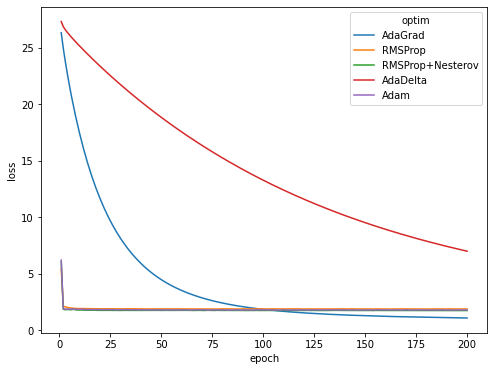

In [10]:
plt.figure(figsize=(8,6))
sns.lineplot(
    data=df_history_l2.reset_index(drop=True), 
    x='epoch', 
    y='loss', 
    hue='optim'
)